## Confidence Regions (Multi-Dimensional Outcomes)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import chi2

from mpl_toolkits.mplot3d import Axes3D
import os



## Visualize Confidence Regions with and Without Covariances (2D)

Plot saved to: /Users/marnar/labrepos/inferenceMGRF/confidence_regions/plots/confidence_regions_2d.pdf


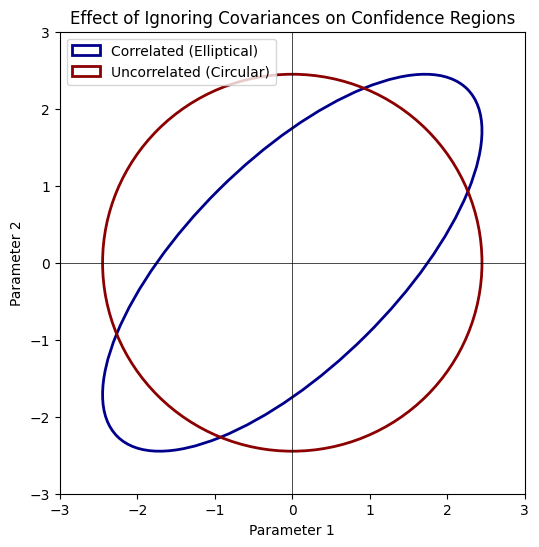

In [19]:

def plot_ellipse(cov, ax, color='b', label=None):
    """ Plot a 2D confidence ellipse based on the covariance matrix. """
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * np.sqrt(chi2.ppf(0.95, df=2) * eigenvalues)

    ellipse = patches.Ellipse(xy=(0, 0), width=width, height=height,
                               angle=angle, edgecolor=color, facecolor='none', lw=2, label=label)
    ax.add_patch(ellipse)

def plot_ellipses_with_and_without_correlation():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    
    # Correlated case (Elliptical confidence region)
    cov_correlated = np.array([[1, 0.7], [0.7, 1]])  # With correlation
    plot_ellipse(cov_correlated, ax, color='darkblue', label='Correlated (Elliptical)')

    # Uncorrelated case (Circular confidence region)
    cov_uncorrelated = np.array([[1, 0], [0, 1]])  # No correlation
    plot_ellipse(cov_uncorrelated, ax, color='darkred', label='Uncorrelated (Circular)')

    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.legend()
    ax.set_title('Effect of Ignoring Covariances on Confidence Regions')
    
    # Define the full path
    base_path = os.path.expanduser('~/labrepos/inferenceMGRF/confidence_regions')
    plots_dir = os.path.join(base_path, 'plots')
    
    # Create plots directory if it doesn't exist
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    # Save plot as PDF using full path
    output_path = os.path.join(plots_dir, 'confidence_regions_2d.pdf')
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Plot saved to: {output_path}")
    plt.show()


# Generate the plot
plot_ellipses_with_and_without_correlation()


## Visualize Confidence Regions with and Without Covariances (3D)

Plot saved to: /Users/marnar/labrepos/inferenceMGRF/confidence_regions/plots/confidence_regions_3d.pdf


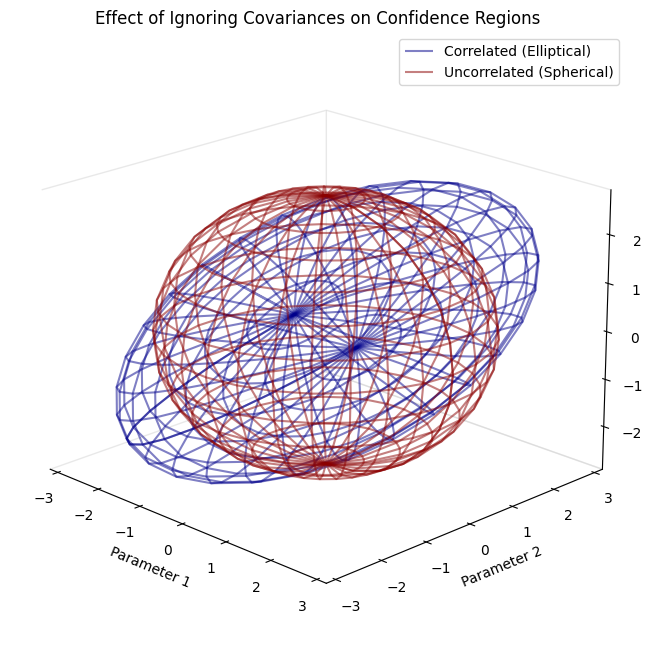

In [30]:

def plot_3d_ellipsoids():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Set white background
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.grid(False)
    
    # Make pane faces white
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    # Make pane edges light grey
    ax.xaxis.pane.set_edgecolor('lightgrey')
    ax.yaxis.pane.set_edgecolor('lightgrey')
    ax.zaxis.pane.set_edgecolor('lightgrey')

    # Plot ellipsoids with labels
    cov_correlated_3d = np.array([[1, 0.5, 0.3],
                                 [0.5, 1, 0.6],
                                 [0.3, 0.6, 1]])
    plot_ellipsoid_fixed(cov_correlated_3d, ax, color='darkblue', alpha=0.5, 
                        label='Correlated (Elliptical)')

    cov_uncorrelated_3d = np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]])
    plot_ellipsoid_fixed(cov_uncorrelated_3d, ax, color='darkred', alpha=0.5,
                        label='Uncorrelated (Spherical)')

    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.set_zlabel('Parameter 3')
    ax.set_title('Effect of Ignoring Covariances on Confidence Regions')
    
    ax.view_init(elev=20, azim=-45)

    # Add legend
    ax.legend()

    # Save plot
    base_path = os.path.expanduser('~/labrepos/inferenceMGRF/confidence_regions')
    plots_dir = os.path.join(base_path, 'plots')
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    output_path = os.path.join(plots_dir, 'confidence_regions_3d.pdf')
    plt.savefig(output_path, bbox_inches='tight', dpi=300, facecolor='white')
    print(f"Plot saved to: {output_path}")
    plt.show()

# Update the plot_ellipsoid_fixed function to include label parameter
def plot_ellipsoid_fixed(cov, ax, color='b', alpha=0.5, label=None):
    """ Plot a 3D confidence ellipsoid based on the covariance matrix. """
    U, S, Vt = np.linalg.svd(cov)
    radii = np.sqrt(chi2.ppf(0.95, df=3) * S)

    # Create sphere
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 15)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))

    # Transform sphere to ellipsoid
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            [x[i, j], y[i, j], z[i, j]] = np.dot(U, np.array([x[i, j] * radii[0], 
                                                              y[i, j] * radii[1], 
                                                              z[i, j] * radii[2]]))

    ax.plot_wireframe(x, y, z, color=color, alpha=alpha, label=label)

# Generate the 3D plot
plot_3d_ellipsoids()
